<a href="https://colab.research.google.com/github/rodwol/Unified-Chart/blob/main/unified_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("reshape2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




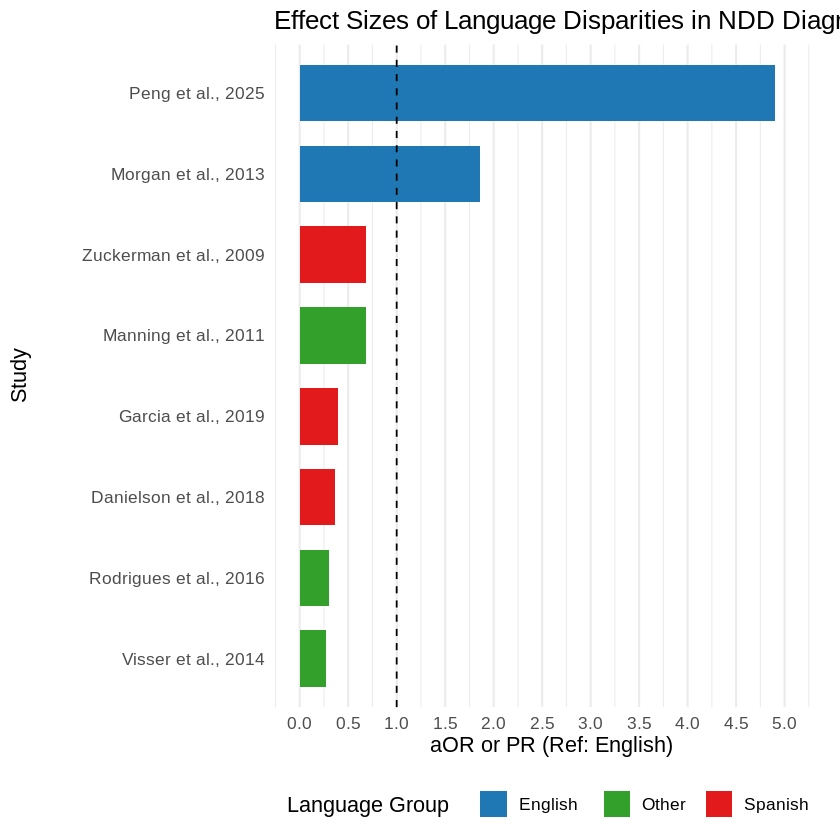

In [ ]:
library(ggplot2)
library(dplyr)

# Data: All studies with reportable aOR/PR or equivalent
effect_data <- data.frame(
  Study = c(
    "Danielson et al., 2018",
    "Rodrigues et al., 2016",
    "Visser et al., 2014",
    "Garcia et al., 2019",
    "Zuckerman et al., 2009",
    "Peng et al., 2025",
    "Manning et al., 2011",
    "Morgan et al., 2013",
    "Zuckerman et al., 2013",
    "Vanegas et al., 2021"
  ),
  EffectSize = c(
    0.36, 0.30, 0.27, 0.40, 0.68, 4.90, 0.68, 1.86, NA, NA  # Effect sizes
  ),
  Group = c(
    "Spanish", "Other", "Other", "Spanish", "Spanish", "English", "Other", "English", "Spanish", "Spanish"
  )
)

# Filter out missing effect sizes
effect_data <- effect_data %>% filter(!is.na(EffectSize))

# Custom colors: English = Blue, Spanish = Red, Other = Dark Green
group_colors <- c("English" = "#1F78B4", "Spanish" = "#E31A1C", "Other" = "#33A02C")

# Plot
ggplot(effect_data, aes(x = reorder(Study, EffectSize), y = EffectSize, fill = Group)) +
  geom_bar(stat = "identity", width = 0.7) +
  coord_flip() +
  geom_hline(yintercept = 1, linetype = "dashed", color = "black") +
  scale_fill_manual(values = group_colors) +
  scale_y_continuous(breaks = seq(0, 5, by = 0.5), limits = c(0, 5.2)) +
  labs(title = "Effect Sizes of Language Disparities in NDD Diagnosis",
       x = "Study",
       y = "aOR or PR (Ref: English)",
       fill = "Language Group") +
  theme_minimal(base_size = 13) +
  theme(panel.grid.major.y = element_blank(),
        legend.position="bottom")


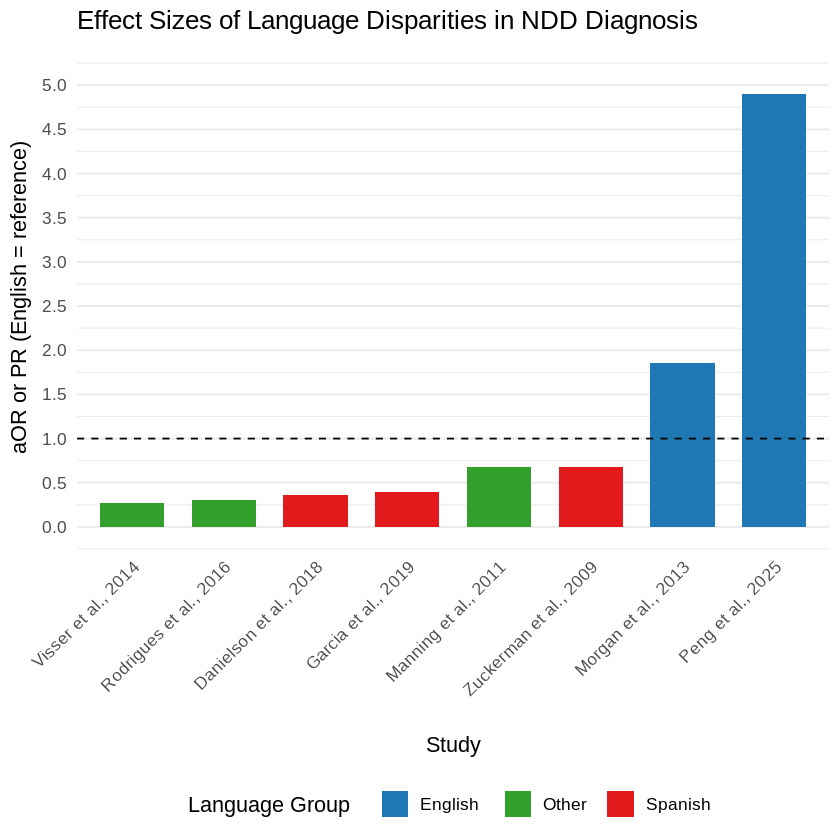

In [ ]:
library(ggplot2)
library(dplyr)

# Data: All studies with reportable aOR/PR
effect_data <- data.frame(
  Study = c(
    "Danielson et al., 2018",
    "Rodrigues et al., 2016",
    "Visser et al., 2014",
    "Garcia et al., 2019",
    "Zuckerman et al., 2009",
    "Peng et al., 2025",
    "Manning et al., 2011",
    "Morgan et al., 2013",
    "Zuckerman et al., 2013",
    "Vanegas et al., 2021"
  ),
  EffectSize = c(
    0.36, 0.30, 0.27, 0.40, 0.68, 4.90, 0.68, 1.86, NA, NA
  ),
  Group = c(
    "Spanish", "Other", "Other", "Spanish", "Spanish", "English", "Other", "English", "Spanish", "Spanish"
  )
)

# Filter out missing values
effect_data <- effect_data %>% filter(!is.na(EffectSize))

# Custom contrasting colors
group_colors <- c("English" = "#1F78B4", "Spanish" = "#E31A1C", "Other" = "#33A02C")

# Vertical bar graph
ggplot(effect_data, aes(x = reorder(Study, EffectSize), y = EffectSize, fill = Group)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "black") +
  scale_fill_manual(values = group_colors) +
  scale_y_continuous(breaks = seq(0, 5, by = 0.5), limits = c(0, 5.2)) +
  labs(title = "Effect Sizes of Language Disparities in NDD Diagnosis",
       x = "Study",
       y = "aOR or PR (English = reference)",
       fill = "Language Group") +
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major.x = element_blank(),
        legend.position="bottom")


In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




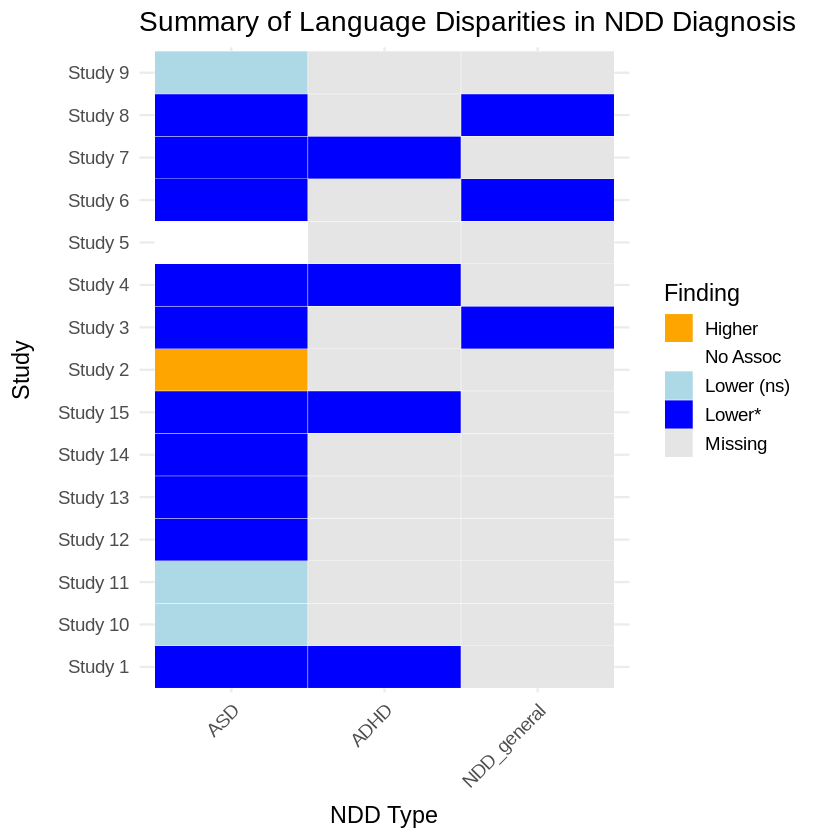

In [ ]:
library(ggplot2)
library(reshape2)
library(forcats)

# Sample data (simplified from your earlier request)
heatmap_data <- data.frame(
  Study = paste("Study", 1:15),
  ASD = c("↓*", "↑", "↓*", "↓*", "=", "↓*", "↓*", "↓*", "↓", "↓", "↓", "↓*", "↓*", "↓*", "↓*"),
  ADHD = c("↓*", NA, NA, "↓*", NA, NA, "↓*", NA, NA, NA, NA, NA, NA, NA, "↓*"),
  NDD_general = c(NA, NA, "↓*", NA, NA, "↓*", NA, "↓*", NA, NA, NA, NA, NA, NA, NA)
)

# Melt the data
melted <- melt(heatmap_data, id.vars = "Study")

# Map findings to categories
melted$value <- factor(melted$value,
                       levels = c("↑", "=", "↓", "↓*"),
                       labels = c("Higher", "No Assoc", "Lower (ns)", "Lower*"))

# Add "Missing" label to NAs
melted$value <- fct_explicit_na(melted$value, na_level = "Missing")

# Create the heatmap plot with transparent background
p <- ggplot(melted, aes(x = variable, y = Study, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_manual(values = c("Higher" = "orange",
                               "No Assoc" = "white",
                               "Lower (ns)" = "lightblue",
                               "Lower*" = "blue",
                               "Missing" = "grey90")) +
  labs(title = "Summary of Language Disparities in NDD Diagnosis",
       x = "NDD Type", y = "Study", fill = "Finding") +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.background = element_rect(fill = NA, colour = NA),
    plot.background = element_rect(fill = NA, colour = NA),
    legend.background = element_rect(fill = NA, colour = NA),
    legend.box.background = element_rect(fill = NA, colour = NA)
  )

# Print the plot
print(p)

# Save the plot with transparent background
ggsave("heatmap_transparent.png", plot = p, width = 8, height = 6, dpi = 300, bg = "transparent")



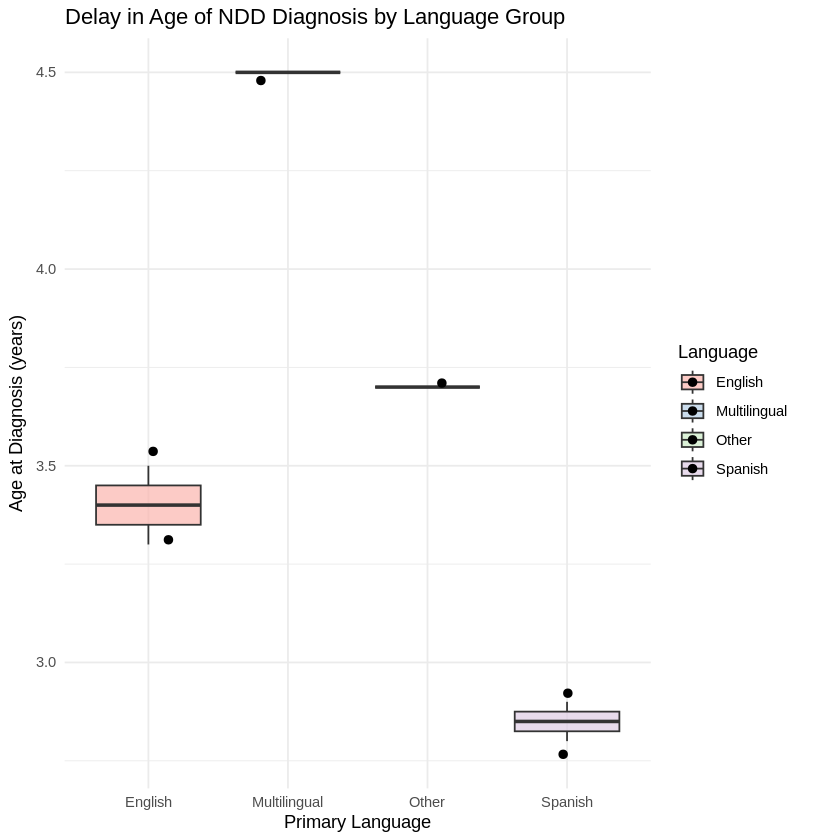

In [ ]:
delay_data <- data.frame(
  Language = c("English", "Spanish", "Other", "Multilingual", "English", "Spanish"),
  Age_Diagnosis = c(3.5, 2.9, 3.7, 4.5, 3.3, 2.8),
  Study = c("Jo 2009", "Jo 2009", "Jo 2009", "Vanegas 2021", "Manning 2011", "Manning 2011")
)

ggplot(delay_data, aes(x = Language, y = Age_Diagnosis, fill = Language)) +
  geom_boxplot(alpha = 0.7) +
  geom_jitter(width = 0.2, size = 2) +
  labs(title = "Delay in Age of NDD Diagnosis by Language Group",
       x = "Primary Language", y = "Age at Diagnosis (years)") +
  theme_minimal() +
  scale_fill_brewer(palette ="Pastel1")


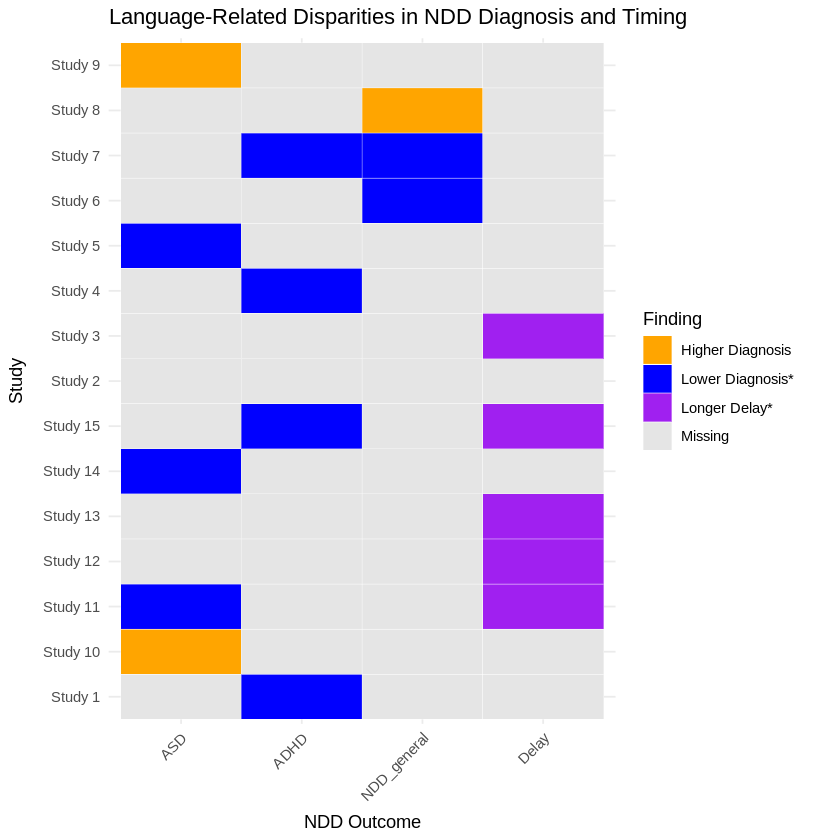

In [ ]:
library(ggplot2)
library(reshape2)
library(forcats)

# Updated data frame
heatmap_data <- data.frame(
  Study = paste("Study", 1:15),
  ASD = c(NA, NA, NA, NA, "↓*", NA, NA, NA, "↑", "↑", "↓*", NA, NA, "↓*", NA),
  ADHD = c("↓*", NA, NA, "↓*", NA, NA, "↓*", NA, NA, NA, NA, NA, NA, NA, "↓*"),
  NDD_general = c(NA, NA, NA, NA, NA, "↓*", "↓*", "↑", NA, NA, NA, NA, NA, NA, NA),
  Delay = c(NA, NA, "↑*", NA, NA, NA, NA, NA, NA, NA, "↑*", "↑*", "↑*", NA, "↑*")
)

# Melt the data to long format
melted <- melt(heatmap_data, id.vars = "Study")

# Recode values into descriptive factor levels
melted$value <- factor(melted$value,
                       levels = c("↑", "↓*", "↑*"),
                       labels = c("Higher Diagnosis", "Lower Diagnosis*", "Longer Delay*"))

# Add explicit label for missing values
melted$value <- fct_explicit_na(melted$value, na_level = "Missing")

# Plot the heatmap
ggplot(melted, aes(x = variable, y = Study, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_manual(values = c("Higher Diagnosis" = "orange",
                               "Lower Diagnosis*" = "blue",
                               "Longer Delay*" = "purple",
                               "Missing" = "grey90")) +
  labs(title = "Language-Related Disparities in NDD Diagnosis and Timing",
       x = "NDD Outcome", y = "Study", fill = "Finding") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45,hjust=1))


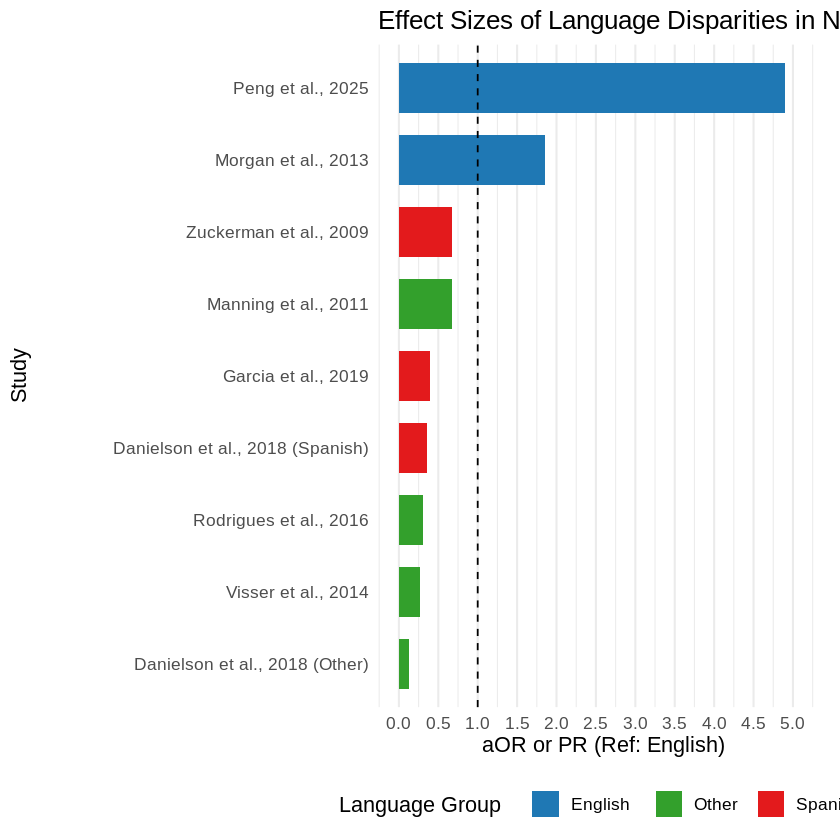

In [ ]:
library(ggplot2)
library(dplyr)

# Updated effect size data
effect_data <- data.frame(
  Study = c(
    "Danielson et al., 2018 (Spanish)",
    "Danielson et al., 2018 (Other)",
    "Rodrigues et al., 2016",
    "Visser et al., 2014",
    "Garcia et al., 2019",
    "Zuckerman et al., 2009",
    "Peng et al., 2025",
    "Manning et al., 2011",
    "Morgan et al., 2013"
  ),
  EffectSize = c(
    0.36, 0.13, 0.30, 0.27, 0.40, 0.68, 4.90, 0.68, 1.86
  ),
  Group = c(
    "Spanish", "Other", "Other", "Other", "Spanish", "Spanish",
    "English", "Other", "English"
  )
)

# Custom colors for language group
group_colors <- c("English" = "#1F78B4", "Spanish" = "#E31A1C", "Other" = "#33A02C")

# Plot
ggplot(effect_data, aes(x = reorder(Study, EffectSize), y = EffectSize, fill = Group)) +
  geom_bar(stat = "identity", width = 0.7) +
  coord_flip() +
  geom_hline(yintercept = 1, linetype = "dashed", color = "black") +
  scale_fill_manual(values = group_colors) +
  scale_y_continuous(breaks = seq(0, 5, by = 0.5), limits = c(0, 5.2)) +
  labs(title = "Effect Sizes of Language Disparities in NDD Diagnosis",
       x = "Study",
       y = "aOR or PR (Ref: English)",
       fill = "Language Group") +
  theme_minimal(base_size = 13) +
  theme(panel.grid.major.y = element_blank(),
        legend.position="bottom")